# Greek Parliament Proceedings

You will work with a dataset containing Greek Parliament proceedings, available at <https://zenodo.org/record/2587904>. The dataset is described in Zenodo; you can also read <https://lab.imedd.org/en/parliamentary-minutes-from-1989-until-today/>.

---

> Panos Louridas, Associate Professor <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> louridas@aueb.gr


## Data Selection and Preparation

As you will find out, the dataset is extensive, as it contains three decades worth of parliamentary proceedings. You can restrict yourself to a subset of the dataset, however that subset must not be trivial. Also keep in mind that a dataset that is too small may be fast to process, but may not be enough to produce good results.

You are free to preprocess the data in any way that seems meaningful and that is likely to be conducive to good results. For instance, you may or may not remove punctuation, stopwords, very frequent or very rare words, etc. You can use any library for preprocessing, like [NLTK](https://www.nltk.org/) or [spaCy](https://spacy.io/); spaCy is more modern and faster. When developing the neural network solution you may do the preprocessing beforehand and / or using the TensorFlow facilities.

In [1]:
#necessary imports for conection with drive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
import pandas as pd
import numpy as np
import seaborn


import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#df = pd.read_csv('Greek_Parliament_Proceedings_1989_2019.csv') 
df = pd.read_csv('https://zenodo.org/record/2587904/files/Greek_Parliament_Proceedings_1989_2019.csv.zip?download=1',compression='zip') 

In [4]:
df['political_party'] = df['political_party'].replace('ανεξαρτητοι ελληνες - πανος καμμενος', 'ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια')
df['political_party'].unique()

array(['πανελληνιο σοσιαλιστικο κινημα', 'βουλη', 'νεα δημοκρατια',
       'κομμουνιστικο κομμα ελλαδας εσωτερικου',
       'κομμουνιστικο κομμα ελλαδας',
       'συνασπισμος της αριστερας των κινηματων και της οικολογιας', nan,
       'λαικος ορθοδοξος συναγερμος',
       'οικολογοι εναλλακτικοι (ομοσπονδια οικολογικων εναλλακτικων οργανωσεων)',
       'ανεξαρτητοι (εκτος κομματος)', 'δημοκρατικη ανανεωση',
       'αντιπολιτευση', 'πολιτικη ανοιξη', 'δημοκρατικο κοινωνικο κινημα',
       'συνασπισμος ριζοσπαστικης αριστερας', 'δημοκρατικη αριστερα',
       'ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια',
       'ανεξαρτητοι δημοκρατικοι βουλευτες',
       'λαικος συνδεσος - χρυση αυγη', 'το ποταμι', 'λαικη ενοτητα',
       'δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)',
       'ενωση κεντρωων'], dtype=object)

In [5]:
df = df[~df['political_party'].isin(['βουλη','αντιπολιτευση'])]

In [6]:
df['sitting_date'] = pd.to_datetime(df['sitting_date'], format="%Y-%m-%d")
df['sitting_date'][9500]
df.dtypes

member_name                      object
sitting_date             datetime64[ns]
parliamentary_period             object
parliamentary_session            object
parliamentary_sitting            object
political_party                  object
speaker_info                     object
speech                           object
dtype: object

## Data Exploration

* Expore the dataset to get an overall idea of what it is about. Think about:

  * Speeches per party.
  
  * Speeches over time.
  
  * Speeches per party and time.
  
  * Speakers per party.
  
  * Etc.
  
* Your analysis can (and should) include tables and diagrams.

In [7]:
df['political_party'] = df['political_party'].replace( 'δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)','πανελληνιο σοσιαλιστικο κινημα')
df['political_party'].unique()

array(['πανελληνιο σοσιαλιστικο κινημα', 'νεα δημοκρατια',
       'κομμουνιστικο κομμα ελλαδας εσωτερικου',
       'κομμουνιστικο κομμα ελλαδας',
       'συνασπισμος της αριστερας των κινηματων και της οικολογιας', nan,
       'λαικος ορθοδοξος συναγερμος',
       'οικολογοι εναλλακτικοι (ομοσπονδια οικολογικων εναλλακτικων οργανωσεων)',
       'ανεξαρτητοι (εκτος κομματος)', 'δημοκρατικη ανανεωση',
       'πολιτικη ανοιξη', 'δημοκρατικο κοινωνικο κινημα',
       'συνασπισμος ριζοσπαστικης αριστερας', 'δημοκρατικη αριστερα',
       'ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια',
       'ανεξαρτητοι δημοκρατικοι βουλευτες',
       'λαικος συνδεσος - χρυση αυγη', 'το ποταμι', 'λαικη ενοτητα',
       'ενωση κεντρωων'], dtype=object)

In [8]:
df = df[df['sitting_date'].dt.year >= 2004]

In [9]:
partygroup = df[['political_party','speech']].groupby('political_party').count().reset_index()
partygroup = partygroup[partygroup['speech'] > df.shape[0]*0.5/100]
df = df[df['political_party'].isin(partygroup['political_party'])]

In [10]:
df = df[~df['political_party'].isin(["ανεξαρτητοι (εκτος κομματος)"])]

Now that we've cleared our parties, let's map them to integers to improve our analyses speed

In [11]:
partylist = df['political_party'].unique()
partylist = partylist.tolist()
df['political_party'] = df['political_party'].apply(lambda x: partylist.index(x))
df = df.reset_index(drop=True)

In [12]:
import spacy
import nltk
nltk.download('punkt')
import spacy.cli
spacy.cli.download("el_core_news_sm")
sp = spacy.load('el_core_news_sm')
from nltk.tokenize import word_tokenize
import string

all_stopwords = sp.Defaults.stop_words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


NOTE: We do not include string.punctuation in our pre-processor. We have included word.isalnum in our filtering, which also deletes punctuation. This is due to the fact that there were too many words with speical characters and actual characters. There main downside to that is that there might be words that are supposed to have unctuation in them (eg. Φ.Π.Α), but the vocabulary was too large to manually filter, and the noise by those words that didn't make sense was too heavy. We could potentialy go in these "hybrid" words on character level and delete the punctuation marks, leaving back the actual characters, but it would be unrealistically time consuming.

In [13]:
def tokstoprem(text):
    text_tokens = word_tokenize(text)
    tokens_without_sw = []
    for word in text_tokens:
        word = word.lower()
        if ((not word in all_stopwords) & (not word.isnumeric()) & ( word.isalnum())):
            tokens_without_sw.append(word)
    #tokens_without_sw= [word.lower() for word in text_tokens if ((not word in all_stopwords) & (not word in string.punctuation) & (not word.isnumeric()))]
    return tokens_without_sw
tester0 = tokstoprem(df['speech'][0])
print(df['speech'][0])
tester0

 Σε δύο ενότητες πότε, κύριε Υπουργέ; Σήμερα;


['δύο', 'ενότητες', 'κύριε', 'υπουργέ', 'σήμερα']

In [14]:
df = df.dropna(subset=['speech'])
df['speech'] = df['speech'].apply(lambda x: tokstoprem(x))

In [15]:
df = df[df['speech'].apply(lambda x: len(x)) > 4]

## Classification without Neural Networks

* Train at least two non-neural network algorithms to learn to classify a speech. The target variable should be the political party of the speaker.

* If a party does not have enough support (in the Machine Learning sense, i.e., too few speeches), you may excise it from the dataset if you detect that you cannot get results for it.

* You should split your data to training and testing datasets, try the different algorithms with cross validation on the training dataset, and find the best hyperparameters for the best algorithm. Note that parameters for bag of words and tf-idf construction can be very important.

* Report your scores; once you find the best algorithm and the best hyperparameters, report the score on the test data.

* To gauge the efficacy of the algorithm, report also the results of a baseline classifier, using, for instance, scikit-learn's [`DummyClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html).

Let's now remove the rows without a political_party, since we can't either train or test our algorithms with these rows. We'll do the same with the empty speeches

In [16]:
df = df[~df['political_party'].isnull()]
df = df[~df['speech'].isnull()].reset_index(drop = True)

In [17]:
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

In [18]:
train_set, test_set = train_test_split(df, test_size = 0.18, random_state = 42)

X_train = train_set['speech']
X_test = test_set['speech']
y_train = train_set['political_party']
y_test = test_set['political_party']

Since we'll be feeding lists to our pipeline, we need the tokenizer not to fail (expecting string). We will override it, creating our own tokenizer, which is nothing more than a dummy, returning exactly the tokens it was fed (We could define the whole pre-processing in a function, but we rather show the steps we took to finalize it.

In [19]:
def own_token(text):
  return text

#### Dummy Classifier

In [20]:
dum_pip = Pipeline([ ('tfidf', TfidfVectorizer(tokenizer=own_token,lowercase=False)),
                    ('clf', DummyClassifier(strategy='most_frequent')),
                    ])
dum_clf = dum_pip.fit(X_train, y_train)
predicted = dum_clf.predict(X_test)

Let's see some features returned from our vecorizer (This has been used to assess the filters used in our final preprocessing methods. Initial preprocessing didn't effectively filter out all punctuation (eg '<<', '>>') and later on, it didn't exclude no meeningful words such as 'alpha*+

In [21]:
dum_pip[0].get_feature_names()[0:1000]

['0133003161που',
 '0157η7',
 '01ba',
 '01gm',
 '01pm',
 '02ba',
 '03ba',
 '04ba',
 '05ba',
 '090407b78dc7ab',
 '0θα',
 '0ι',
 '0σε',
 '1000kw',
 '1000mw',
 '100kw',
 '100mbps',
 '100mw',
 '100η',
 '100μw',
 '100ο',
 '100ου',
 '101α',
 '101η',
 '101ης',
 '102η',
 '102ο',
 '103ο',
 '104η',
 '104ο',
 '105ο',
 '105ου',
 '106α',
 '106β',
 '106η',
 '107ο',
 '109η',
 '10gw',
 '10kw',
 '10mwh',
 '10ήμερο',
 '10α',
 '10β',
 '10ενισχυτικά',
 '10ετής',
 '10ετία',
 '10ετίας',
 '10ετίες',
 '10ετούς',
 '10ευρα',
 '10ευρώ',
 '10η',
 '10ης',
 '10θ',
 '10ιβ',
 '10ιγ',
 '10κ',
 '10μελούς',
 '10μμ',
 '10ο',
 '10ον',
 '10ος',
 '10ου',
 '10πλάσιο',
 '10χ',
 '10χρόνος',
 '110α',
 '110β',
 '110γ',
 '110θ',
 '111η',
 '112ο',
 '113η',
 '113πμ',
 '114ο',
 '1159β',
 '115η',
 '116ης',
 '117β',
 '117ου',
 '118α',
 '118χυ',
 '11α',
 '11από',
 '11β',
 '11βλ',
 '11γ',
 '11δις',
 '11δισεκατομμύρια',
 '11η',
 '11ης',
 '11κ',
 '11μηνο',
 '11ο',
 '11οι',
 '11ου',
 '11ωρη',
 '11ωρο',
 '1200τμ',
 '120mm',
 '120ο',
 '121α'

In [22]:
print(metrics.classification_report(y_test, predicted, target_names=partylist))

                                                            precision    recall  f1-score   support

                               κομμουνιστικο κομμα ελλαδας       0.00      0.00      0.00      4639
                            πανελληνιο σοσιαλιστικο κινημα       0.00      0.00      0.00     17293
                                            νεα δημοκρατια       0.38      1.00      0.55     25761
                       συνασπισμος ριζοσπαστικης αριστερας       0.00      0.00      0.00     12403
                               λαικος ορθοδοξος συναγερμος       0.00      0.00      0.00      2567
                                      δημοκρατικη αριστερα       0.00      0.00      0.00       440
ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια       0.00      0.00      0.00      1893
                              λαικος συνδεσος - χρυση αυγη       0.00      0.00      0.00       887
                                                 το ποταμι       0.00      0.00      0.00       483

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
cmdf = metrics.confusion_matrix(y_test, predicted)

In [24]:
def conmat(matrix):
  fig, ax = plt.subplots()
  cm = matrix
  #tp = cm[1,1]
  #tn = cm[0,0]
  #fp = cm[0,1]
  #fn = cm[1,0]
  sns.heatmap(cm, annot=True, fmt='d', linewidths=.5, ax = ax, xticklabels = partylist, yticklabels = partylist)
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted party')
  ax.set_ylabel('Actual party')
  plt.show()

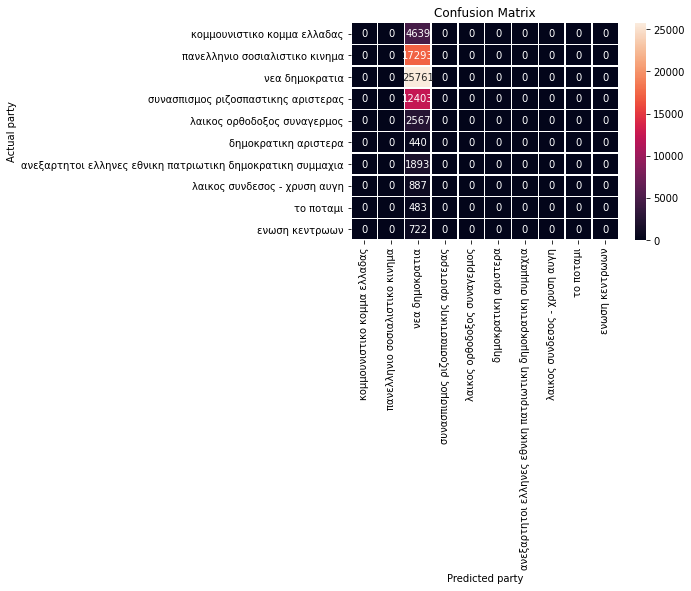

In [25]:
conmat(cmdf)

### Multinomial Naive Bayes Classifier

NOTE: setting n_jobs to -1 returns "The exit codes of the workers are {SIGKILL(-9)}" error. (when ran on google colab).<br>As such, we set it to -2, which works, and only leaves one core/thread out of usage (not that easy to find the actual number of threads on the machine we're runing on) from google colab

In [ ]:
parameters = {'tfidf__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'tfidf__max_df': (0.6, 0.7),
              'tfidf__min_df': (0.01, 0.05),
              'clf__alpha': (1e-2, 1e-3),
             }
mnb_pipe = Pipeline([ ('tfidf', TfidfVectorizer(tokenizer=own_token,lowercase=False)),
                     ('clf', MultinomialNB()),
                    ])
mnb_clf = mnb_pipe.fit(X_train, y_train)
gs_clf_mnb = GridSearchCV(mnb_clf, parameters, n_jobs=-2, cv=5)
gs_clf_mnb = gs_clf_mnb.fit(X_train, y_train)
predicted_mnb = gs_clf_mnb.predict(X_test)
gs_clf_mnb.best_params_

{'clf__alpha': 0.01,
 'tfidf__max_df': 0.6,
 'tfidf__min_df': 0.01,
 'tfidf__ngram_range': (1, 2),
 'tfidf__use_idf': True}

In [ ]:
print(metrics.classification_report(y_test, predicted_mnb, target_names=partylist))

                                                            precision    recall  f1-score   support

                               κομμουνιστικο κομμα ελλαδας       0.85      0.21      0.34      4639
                            πανελληνιο σοσιαλιστικο κινημα       0.35      0.37      0.36     17293
                                            νεα δημοκρατια       0.44      0.76      0.56     25761
                       συνασπισμος ριζοσπαστικης αριστερας       0.45      0.07      0.11     12403
                               λαικος ορθοδοξος συναγερμος       0.22      0.02      0.04      2567
                                      δημοκρατικη αριστερα       0.88      0.03      0.06       440
ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια       0.08      0.02      0.03      1893
                              λαικος συνδεσος - χρυση αυγη       0.72      0.25      0.38       887
                                                 το ποταμι       0.00      0.00      0.00       483

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cmnb = metrics.confusion_matrix(y_test, predicted_mnb)

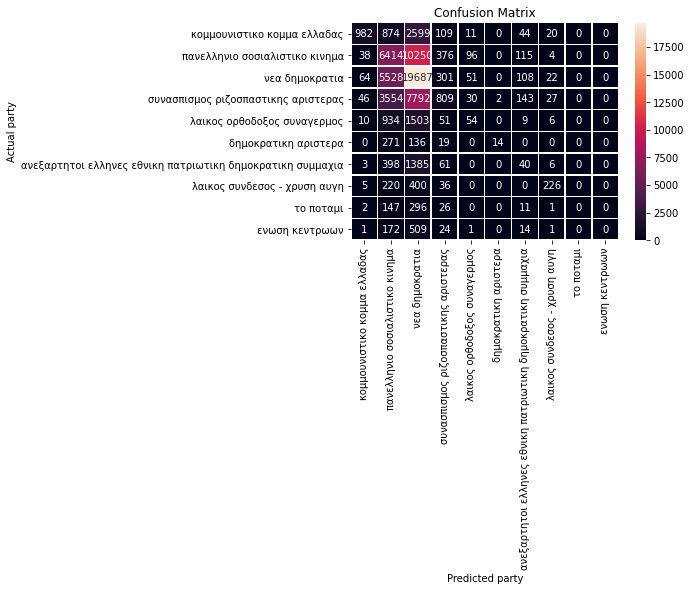

In [ ]:
conmat(cmnb)

Some of our best parameters will remain definite (use_idf = True, ngram_range = (1,2)). We have a specific direction from the choice of the rest hyperparameters. Let's see if changing the alternatives towards the best direction will improve our results

In [ ]:
mnb_parameters2 = {'tfidf__max_df': (0.5, 0.35),
              'tfidf__min_df': (0.01, 0.005),
              'clf__alpha': (0.01, 0.05),
             }
mnb_pipe2 = Pipeline([ ('tfidf', TfidfVectorizer(tokenizer=own_token,lowercase=False, ngram_range=(1, 2))),
                     ('clf', MultinomialNB()),
                    ])
mnb_clf2 = mnb_pipe2.fit(X_train, y_train)
gs_clf_mnb2 = GridSearchCV(mnb_clf2, mnb_parameters2, n_jobs=-2, cv=5)
gs_clf_mnb2 = gs_clf_mnb2.fit(X_train, y_train)
predicted_mnb2 = gs_clf_mnb2.predict(X_test)
gs_clf_mnb2.best_params_

{'clf__alpha': 0.01, 'tfidf__max_df': 0.35, 'tfidf__min_df': 0.005}

In [ ]:
print(metrics.classification_report(y_test, predicted_mnb2, target_names=partylist))

                                                            precision    recall  f1-score   support

                               κομμουνιστικο κομμα ελλαδας       0.86      0.24      0.38      4639
                            πανελληνιο σοσιαλιστικο κινημα       0.37      0.36      0.37     17293
                                            νεα δημοκρατια       0.44      0.79      0.56     25761
                       συνασπισμος ριζοσπαστικης αριστερας       0.55      0.07      0.12     12403
                               λαικος ορθοδοξος συναγερμος       0.78      0.03      0.06      2567
                                      δημοκρατικη αριστερα       0.64      0.04      0.07       440
ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια       0.09      0.02      0.03      1893
                              λαικος συνδεσος - χρυση αυγη       0.78      0.25      0.38       887
                                                 το ποταμι       0.00      0.00      0.00       483

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cmnb2 = metrics.confusion_matrix(y_test, predicted_mnb2)

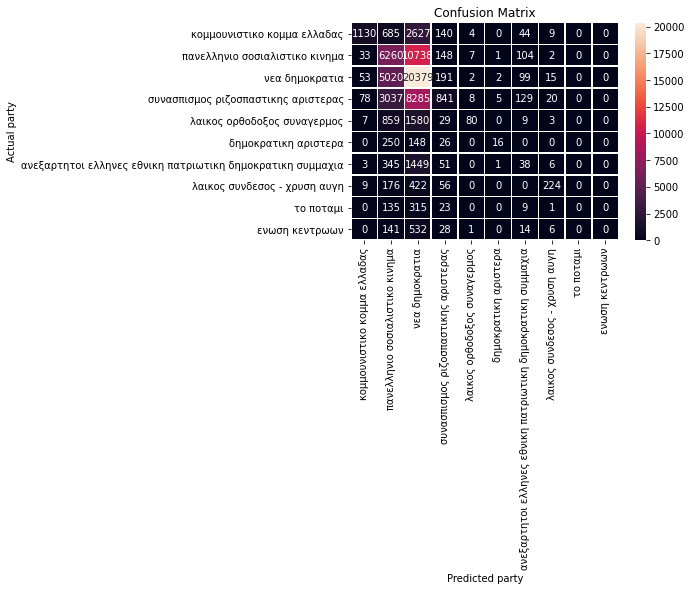

In [ ]:
conmat(cmnb2)

We have an aproximate best value for some parameters (alpha, about 0.01)
Our max_df and min_df are better the lower they get so far. 

However, they improve our accuracy results by a non-significant amount. We will have a few more runs with gridsearching some of the hyperparameters, and once we find some optimized interval, and then move on to another classifier. <br> We will change our min_df classifier tactic from percentage to absolute values (we have discussed in detail why this makes sense, on our word-level analysis of the data exploration)

In [ ]:
mnb_parameters3 = {'tfidf__min_df': (10, 20, 50, 100),
                  'tfidf__max_df': (0.35, 0.25)
             }
mnb_pipe3 = Pipeline([ ('tfidf', TfidfVectorizer(tokenizer=own_token,lowercase=False, ngram_range=(1, 2))),
                     ('clf', MultinomialNB(alpha= 0.05)),
                    ])
mnb_clf3 = mnb_pipe3.fit(X_train, y_train)
gs_clf_mnb3 = GridSearchCV(mnb_clf3, mnb_parameters3, n_jobs=-2, cv=5)
gs_clf_mnb3 = gs_clf_mnb3.fit(X_train, y_train)
predicted_mnb3 = gs_clf_mnb3.predict(X_test)
gs_clf_mnb3.best_params_

{'tfidf__max_df': 0.25, 'tfidf__min_df': 10}

In [ ]:
print(metrics.classification_report(y_test, predicted_mnb3, target_names=partylist))

                                                            precision    recall  f1-score   support

                               κομμουνιστικο κομμα ελλαδας       0.84      0.32      0.47      4639
                            πανελληνιο σοσιαλιστικο κινημα       0.46      0.43      0.45     17293
                                            νεα δημοκρατια       0.49      0.78      0.60     25761
                       συνασπισμος ριζοσπαστικης αριστερας       0.56      0.29      0.38     12403
                               λαικος ορθοδοξος συναγερμος       0.70      0.18      0.29      2567
                                      δημοκρατικη αριστερα       0.46      0.09      0.15       440
ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια       0.25      0.06      0.10      1893
                              λαικος συνδεσος - χρυση αυγη       0.61      0.43      0.51       887
                                                 το ποταμι       0.67      0.00      0.01       483

In [ ]:
cmnb3 = metrics.confusion_matrix(y_test, predicted_mnb3)

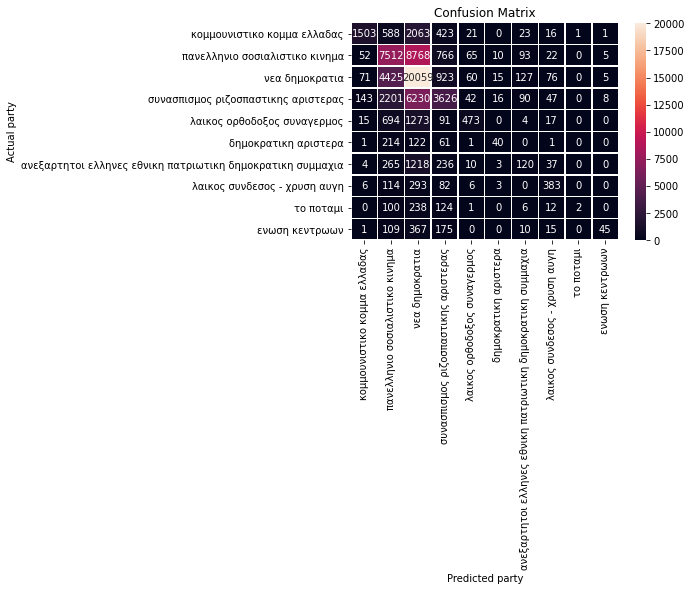

In [ ]:
conmat(cmnb3)

In [ ]:
mnb_parameters4 = {'tfidf__min_df': (5, 8, 10),
                  'tfidf__max_df': (0.15, 0.25)
             }
mnb_pipe4 = Pipeline([ ('tfidf', TfidfVectorizer(tokenizer=own_token,lowercase=False, ngram_range=(1, 2))),
                     ('clf', MultinomialNB(alpha= 0.05)),
                    ])
mnb_clf4 = mnb_pipe4.fit(X_train, y_train)
gs_clf_mnb4 = GridSearchCV(mnb_clf4, mnb_parameters4, n_jobs=-2, cv=5)
gs_clf_mnb4 = gs_clf_mnb4.fit(X_train, y_train)
predicted_mnb4 = gs_clf_mnb4.predict(X_test)
gs_clf_mnb4.best_params_

{'tfidf__max_df': 0.25, 'tfidf__min_df': 5}

In [ ]:
print(metrics.classification_report(y_test, predicted_mnb4, target_names=partylist))

                                                            precision    recall  f1-score   support

                               κομμουνιστικο κομμα ελλαδας       0.84      0.33      0.47      4639
                            πανελληνιο σοσιαλιστικο κινημα       0.47      0.44      0.45     17293
                                            νεα δημοκρατια       0.49      0.78      0.61     25761
                       συνασπισμος ριζοσπαστικης αριστερας       0.56      0.30      0.39     12403
                               λαικος ορθοδοξος συναγερμος       0.67      0.18      0.28      2567
                                      δημοκρατικη αριστερα       0.56      0.05      0.09       440
ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια       0.27      0.06      0.09      1893
                              λαικος συνδεσος - χρυση αυγη       0.63      0.42      0.51       887
                                                 το ποταμι       0.33      0.00      0.00       483

In [ ]:
cmnb4 = metrics.confusion_matrix(y_test, predicted_mnb4)

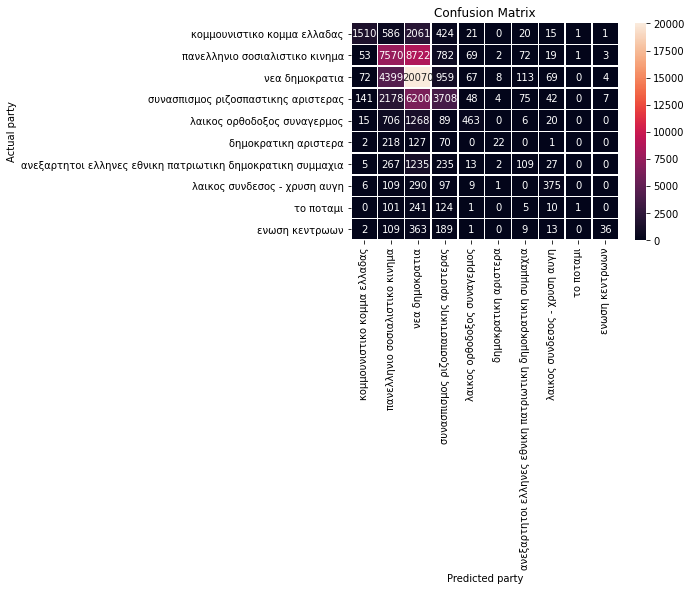

In [ ]:
conmat(cmnb4)

It's safe to assume that we're close to what MNB has to offer. We keep our hyperparameters to values close to the following:<br>
tfidf_max = 0.25<br>
tfidf_min = 5 (still the lower the better)<br>
use_idf= True (default)<br><br>
As for alpha, we'll have to search again, since the meaning is different.

#### Stohastic Gradient Descent Classifier

In [34]:
from sklearn.linear_model import SGDClassifier

sgd_parameters = {'tfidf__max_df': (0.2,0.25,0.3),
              'tfidf__min_df': (5,3,2),
              'clf__alpha': (0.0001, 0.0005),
              'clf__learning_rate': ('optimal', 'adaptive')
             }

sgd_pipe = Pipeline([ ('tfidf', TfidfVectorizer(tokenizer=own_token,lowercase=False, ngram_range=(1, 2))),
                     ('clf', SGDClassifier(penalty='l2', random_state=89, n_jobs = -2, eta0 = 0.1))
                    ])
sgd_clf = sgd_pipe.fit(X_train, y_train)
gs_clf_sgd = GridSearchCV(sgd_clf, sgd_parameters, n_jobs=-2, cv=5)
gs_clf_sgd = gs_clf_sgd.fit(X_train, y_train)
predicted_sgd = gs_clf_sgd.predict(X_test)
gs_clf_sgd.best_params_

{'clf__alpha': 0.0001,
 'clf__learning_rate': 'optimal',
 'tfidf__max_df': 0.2,
 'tfidf__min_df': 2}

In [29]:
print(metrics.classification_report(y_test, predicted_sgd, target_names=partylist))

                                                            precision    recall  f1-score   support

                               κομμουνιστικο κομμα ελλαδας       0.56      0.44      0.49      4639
                            πανελληνιο σοσιαλιστικο κινημα       0.53      0.34      0.41     17293
                                            νεα δημοκρατια       0.51      0.85      0.64     25761
                       συνασπισμος ριζοσπαστικης αριστερας       0.52      0.32      0.40     12403
                               λαικος ορθοδοξος συναγερμος       0.64      0.18      0.28      2567
                                      δημοκρατικη αριστερα       0.41      0.07      0.12       440
ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια       0.38      0.05      0.08      1893
                              λαικος συνδεσος - χρυση αυγη       0.68      0.45      0.54       887
                                                 το ποταμι       0.13      0.02      0.04       483

In [30]:
cmsgd = metrics.confusion_matrix(y_test, predicted_sgd)

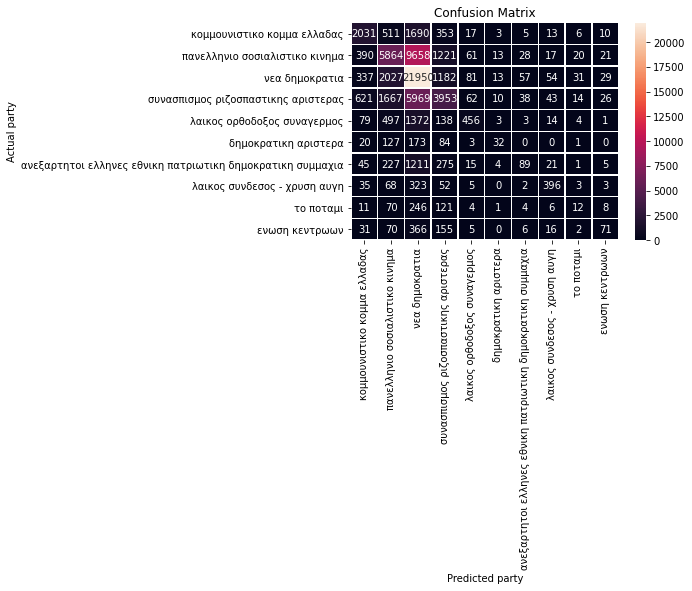

In [31]:
conmat(cmsgd)

In [35]:
sgd_parameters2 = {'tfidf__max_df': (0.2,0.15),
              'tfidf__min_df': (1,2),
              'clf__eta0': (0.1, 0.01)
             }

sgd_pipe2 = Pipeline([ ('tfidf', TfidfVectorizer(tokenizer=own_token,lowercase=False, ngram_range=(1, 2))),
                     ('clf', SGDClassifier(penalty='l2', random_state=89, n_jobs = -2, eta0 = 0.0001,))
                    ])
sgd_clf2 = sgd_pipe2.fit(X_train, y_train)
gs_clf_sgd2 = GridSearchCV(sgd_clf2, sgd_parameters2, n_jobs=-2, cv=5)
gs_clf_sgd2 = gs_clf_sgd2.fit(X_train, y_train)
predicted_sgd2 = gs_clf_sgd2.predict(X_test)
gs_clf_sgd2.best_params_

{'clf__eta0': 0.1,
 'clf__learning_rate': 'optimal',
 'tfidf__max_df': 0.2,
 'tfidf__min_df': 2}

In [38]:
print(metrics.classification_report(y_test, predicted_sgd2, target_names=partylist))

                                                            precision    recall  f1-score   support

                               κομμουνιστικο κομμα ελλαδας       0.56      0.44      0.49      4639
                            πανελληνιο σοσιαλιστικο κινημα       0.53      0.34      0.41     17293
                                            νεα δημοκρατια       0.51      0.85      0.64     25761
                       συνασπισμος ριζοσπαστικης αριστερας       0.52      0.32      0.40     12403
                               λαικος ορθοδοξος συναγερμος       0.64      0.18      0.28      2567
                                      δημοκρατικη αριστερα       0.41      0.07      0.12       440
ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια       0.38      0.05      0.08      1893
                              λαικος συνδεσος - χρυση αυγη       0.68      0.45      0.54       887
                                                 το ποταμι       0.13      0.02      0.04       483

In [39]:
cmsgd2 = metrics.confusion_matrix(y_test, predicted_sgd2)

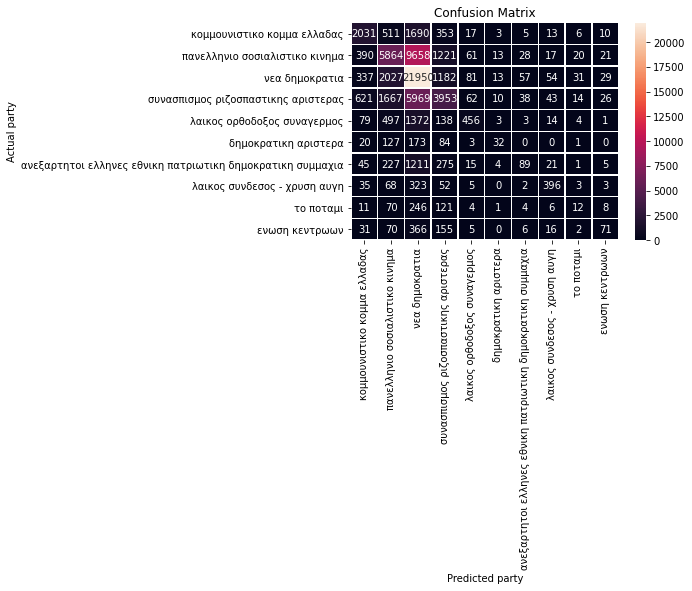

In [40]:
conmat(cmsgd2)

We can say that once again we're close to optimal hyperparameter intervals. Let's try one more classifier

In [70]:
parameters = {'tfidf__ngram_range': [(1, 2)],
              'tfidf__token_pattern': [r'\b\w{2,}+\b|\@\w+\b|\#\w+\b',r'\b\w+\b'],
              'clf__objective': ['multi:softmax'],
              'clf__colsample_bytree': [0.4, 0.5],
              'clf__learning_rate': [0.05, 0.15],
              'clf__max_depth': [4, 5], 
              'clf__reg_lambda': [0.5, 1.5]
             }

import xgboost as xgb

XGB_pip = Pipeline([ ('tfidf', TfidfVectorizer(lowercase=True, stop_words=None, strip_accents=None, 
                                               use_idf=True, ngram_range= (1,2))),
                     ('clf', xgb.XGBClassifier()),
                    ])
XGB_clf = GridSearchCV(XGB_pip, parameters, n_jobs=-1, refit=True, cv=4, verbose=2).fit(X_train, y_train)